# Jina-CLIP-V2 PyTorch转Paddle 模型推理对齐教程

# 0 模型概述

Jina-CLIP-v2：多语言多模态的文本图像向量模型

多模态向量通过统一的数据表示，实现了不同模态数据的搜索和理解，是神经检索和多模态生成式 AI 应用的基石。Jina-AI推出了全新的通用多语言多模态向量模型 —— jina-clip-v2。该模型基于 jina-clip-v1 和 jina-embeddings-3 构建，并实现了多项关键改进：

1. 性能提升：v2 在文本-图像和文本-文本检索任务中，性能较 v1 提升了 3%。此外，与 v1 类似，v2 的文本编码器也能高效地应用于多语言长文本密集检索索，其性能可与我们目前最先进的模型 —— 参数量低于 1B 的最佳多语言向量模型 jina-embeddings-v3（基于 MTEB 排行榜）—— 相媲美。

2. 多语言支持：以 jina-embeddings-v3 作为文本塔，jina-clip-v2 支持 89 种语言的多语言图像检索，并在该任务上的性能相比 nllb-clip-large-siglip 提升了 4%。

3. 更高图像分辨率：v2 支持 512x512 像素的输入图像分辨率，相比 v1 的 224x224 有了大幅提升。能够更好地捕捉图像细节，提升特征提取的精度，并更准确地识别细粒度视觉元素。

4. 可变维度输出：jina-clip-v2 引入了俄罗斯套娃表示学习（Matryoshka Representation Learning，MRL）技术，只需设置 dimensions 参数，即可获取指定维度的向量输出，且在减少存储成本的同时，保持强大的性能。



- 模型开源链接: https://huggingface.co/jinaai/jina-clip-v2

- API 快速上手:  https://jina.ai/?sui=&model=jina-clip-v2

## Jina-CLIP-v2 模型结构
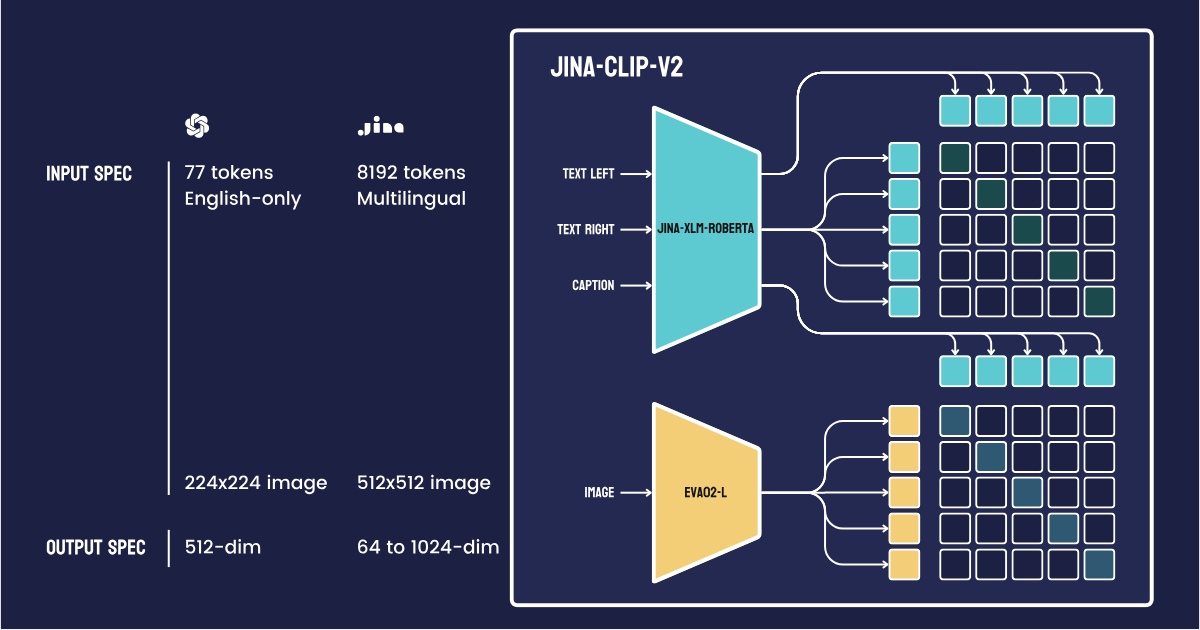

- 视觉编码器：
- 语言编码器：

# 1 权重转换

通过分析模型组网代码和model.safetensors.index.json文件，可以清晰识别出需要转换的权重层。
在转换过程中需要注意以下几点：

## 1.1 PyTorch与Paddle的差异处理
主要差异在于线性层的权重矩阵需要进行转置操作。需要转置的层包含：

```Python
need_transpose = {
    # 语言模型部分
    "mlp.down_proj.weight",
    "mlp.gate_proj.weight",
    "mlp.up_proj.weight",
    "self_attn.q_proj.weight",
    "self_attn.k_proj.weight",
    "self_attn.v_proj.weight",
    "self_attn.o_proj.weight",
    "lm_head.weight",
    
    # 视觉模型部分

    # 重采样部分

}
```

## 1.2 模型的命名调整


## 1.3 完整转换脚本

## 

# 2 代码转换注意事项

## 2.1 代码转换工具使用
推荐使用Paddle官方转换工具：PaConvert。注意，Paddle不完全兼容一些函数，需要手动修改。

## 2.2 转换注意事项
代码组织优化
- 删除使用工具转换生成的utils处理包，保持代码结构简洁
- 按照PaddleMIX规范组织代码结构

    - 模型代码：paddlemix/models/
    - 预测脚本：paddlemix/examples/
    - 图像预处理：paddlemix/processors/

## 2.3 API差异处理

### 2.3.1 基础操作转换：
```Python
# PyTorch -> Paddle 常见替换
# view -> reshape
x = x.reshape(shape)
# permute -> transpose (注意：paddle需要明确指定所有维度)
x = x.transpose([0,2,1,3])
```

### 2.3.2特殊情况处理


## 模型组件替换
1. 优先

2. 注意Qwen2模型替换

3. MultiHeadAttention适配
    


# 3. 代码组织优化

建议按照PaddleMIX规范组织代码结构

```
paddlemix/
├── models/          # 模型代码
├── examples/        # 预测脚本
└── processors/      # 图像预处理
```